#Universidad Autónoma de Chihuahua
##Facultad de Ingeniería
##Maestría en Computación
###Machine Learning
###Dra Olanda Prieto Ordaz
###Maritrini Velázquez Ruiz 329675

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
stroke_df = pd.read_csv('/content/healthcare-dataset-stroke-data.xls')

In [3]:
#Visualización de la base de datos
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
stroke_df.shape

(5110, 12)

In [5]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
stroke_df.duplicated().sum()

0

In [112]:
new_stroke = stroke_df.drop(['id'], axis=1)
new_stroke2 = stroke_df.drop(['id'], axis=1)
new_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
stroke_df.gender.value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


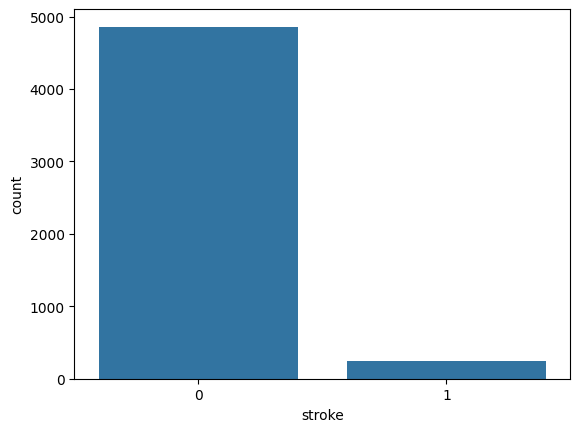

In [9]:
#Conteo de la etiqueta target (stroke)
sns.countplot(x='stroke', data=stroke_df)
plt.show()

<ipython-input-10-1e39fd784357>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=stroke_df, palette='hls')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list

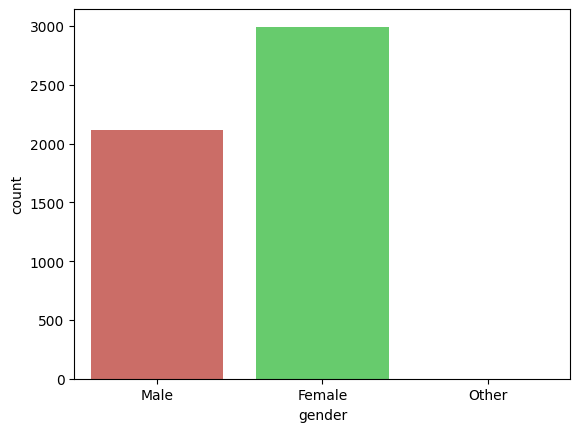

In [10]:
sns.countplot(x='gender', data=stroke_df, palette='hls')
plt.show()

In [11]:
stroke_df.smoking_status.value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


<ipython-input-12-decf3a307382>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking_status', data=stroke_df, palette='hls')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a lengt

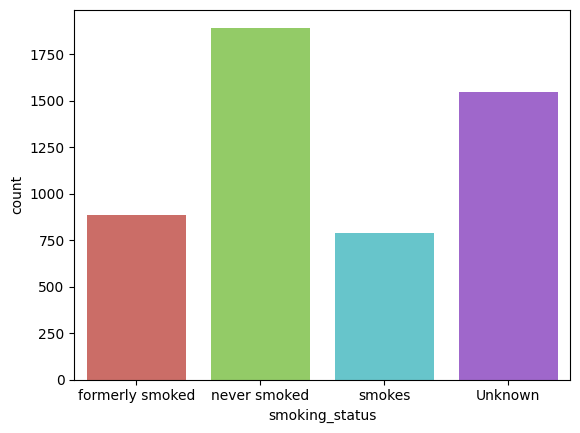

In [12]:
sns.countplot(x='smoking_status', data=stroke_df, palette='hls')
plt.show()

In [13]:
new_stroke.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


In [14]:
stroke_df.hypertension.value_counts()

,count
hypertension,
0,4612
1,498


<ipython-input-15-616b500ef4c7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hypertension', data=stroke_df, palette='Paired')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


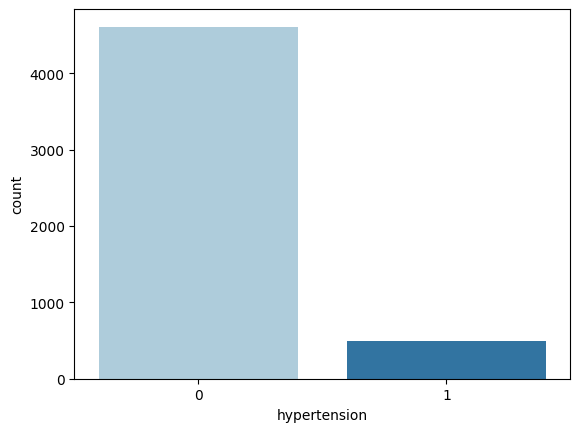

In [15]:
sns.countplot(x='hypertension', data=stroke_df, palette='Paired')
plt.show()

In [16]:
stroke_df.ever_married.value_counts()

,count
ever_married,
Yes,3353
No,1757


In [17]:
stroke_df.age.value_counts()

,count
age,
78.00,102
57.00,95
52.00,90
54.00,87
51.00,86
...,...
1.40,3
0.48,3
0.16,3


<ipython-input-18-1e39fd784357>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=stroke_df, palette='hls')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list

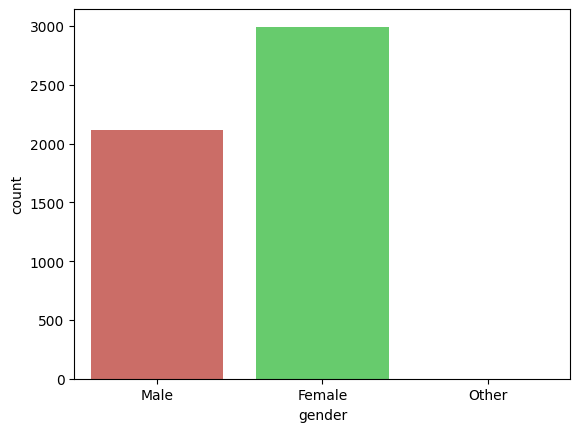

In [18]:
sns.countplot(x='gender', data=stroke_df, palette='hls')
plt.show()

<ipython-input-19-154b6d0e45ea>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ever_married', data=stroke_df, palette='husl')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


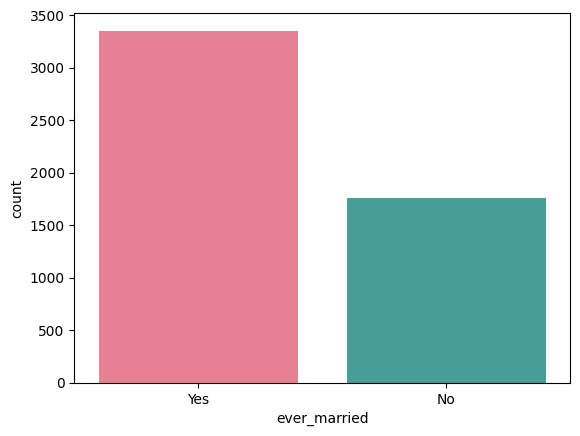

In [19]:
sns.countplot(x='ever_married', data=stroke_df, palette='husl')
plt.show()

<ipython-input-20-decf3a307382>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking_status', data=stroke_df, palette='hls')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a lengt

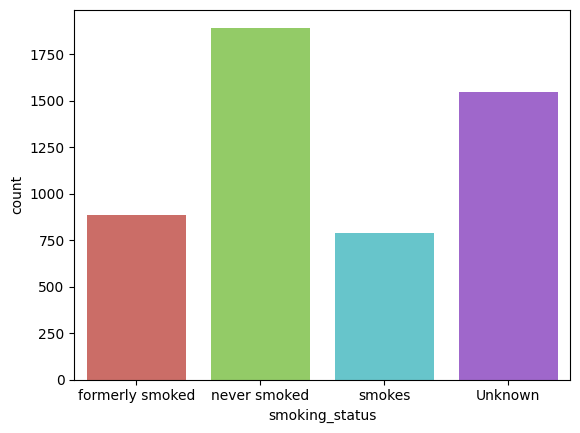

In [20]:
sns.countplot(x='smoking_status', data=stroke_df, palette='hls')
plt.show()

<ipython-input-21-f7c747787eaf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='heart_disease', data=stroke_df, palette='hls')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


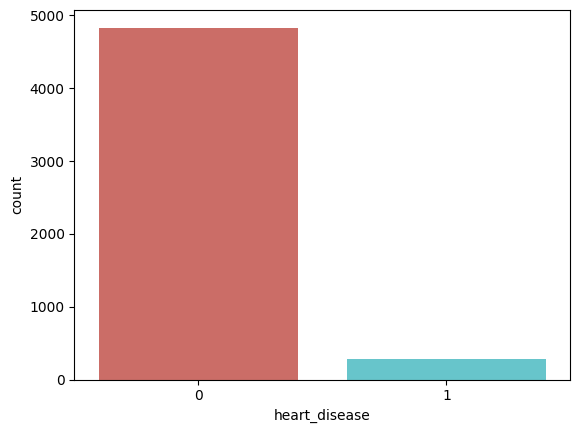

In [21]:
sns.countplot(x='heart_disease', data=stroke_df, palette='hls')
plt.show()

In [22]:
#Rellenar los datos vacios de bmi con el promedio
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') #default 'mean'

In [23]:
column_to_impute = new_stroke[['bmi']]

In [24]:
imputer.fit(column_to_impute)

SimpleImputer()

In [25]:
new_stroke['bmi'] = imputer.transform(column_to_impute)

In [26]:
new_stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [27]:
##cambiar los atributos categóricos a numéricos
from sklearn.preprocessing import LabelEncoder
labelEn = LabelEncoder()
labelEn.fit(new_stroke['gender'])
print(list(labelEn.classes_))
print(labelEn.transform(['Female', 'Male', 'Other']))

['Female', 'Male', 'Other']
[0 1 2]


In [28]:
new_stroke['gender']=labelEn.fit_transform(new_stroke['gender'])

In [29]:
labelEn.fit(new_stroke['smoking_status'])
list(labelEn.classes_)

['Unknown', 'formerly smoked', 'never smoked', 'smokes']

In [30]:
labelEn.fit(new_stroke['ever_married'])
list(labelEn.classes_)

['No', 'Yes']

In [31]:
labelEn.fit(new_stroke['Residence_type'])
list(labelEn.classes_)

['Rural', 'Urban']

In [32]:
labelEn.fit(new_stroke['work_type'])
list(labelEn.classes_)

['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']

In [33]:
new_stroke['work_type']=labelEn.fit_transform(new_stroke['work_type'])
new_stroke['Residence_type']=labelEn.fit_transform(new_stroke['Residence_type'])
new_stroke['smoking_status']=labelEn.fit_transform(new_stroke['smoking_status'])
new_stroke['ever_married']=labelEn.fit_transform(new_stroke['ever_married'])

In [34]:
new_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [35]:
new_stroke.gender.value_counts()

,count
gender,
0,2994
1,2115
2,1


In [36]:
#eliminar datos redundantes
new_stroke[new_stroke.gender.values > 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,2,26.0,0,0,0,2,0,143.33,22.4,1,0


In [37]:
index=new_stroke[new_stroke.gender.values > 1].index
index

Index([3116], dtype='int64')

In [38]:
new_stroke=new_stroke.drop([new_stroke.index[3116]], axis=0)

In [39]:
new_stroke.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,0.413975,43.229986,0.097475,0.054022,0.656293,2.167743,0.508123,106.140399,28.894508,1.376982,0.048738
std,0.492592,22.613575,0.296633,0.226084,0.474991,1.090398,0.499983,45.285004,7.698235,1.071626,0.215340
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.240000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.880000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [40]:
new_stroke.stroke.value_counts()

,count
stroke,
0,4860
1,249


In [41]:
new_stroke.hypertension.value_counts()

,count
hypertension,
0,4611
1,498


In [42]:
new_stroke.smoking_status.value_counts()

,count
smoking_status,
2,1892
0,1544
1,884
3,789


In [43]:
new_stroke.heart_disease.value_counts()

,count
heart_disease,
0,4833
1,276


In [44]:
##correlation matrix
corr_matrix = new_stroke.corr()
corr_matrix["stroke"].sort_values(ascending=False)

,stroke
stroke,1.000000
age,0.245239
heart_disease,0.134905
avg_glucose_level,0.131991
hypertension,0.127891
ever_married,0.108299
bmi,0.038912
smoking_status,0.028108
Residence_type,0.015415
gender,0.009081


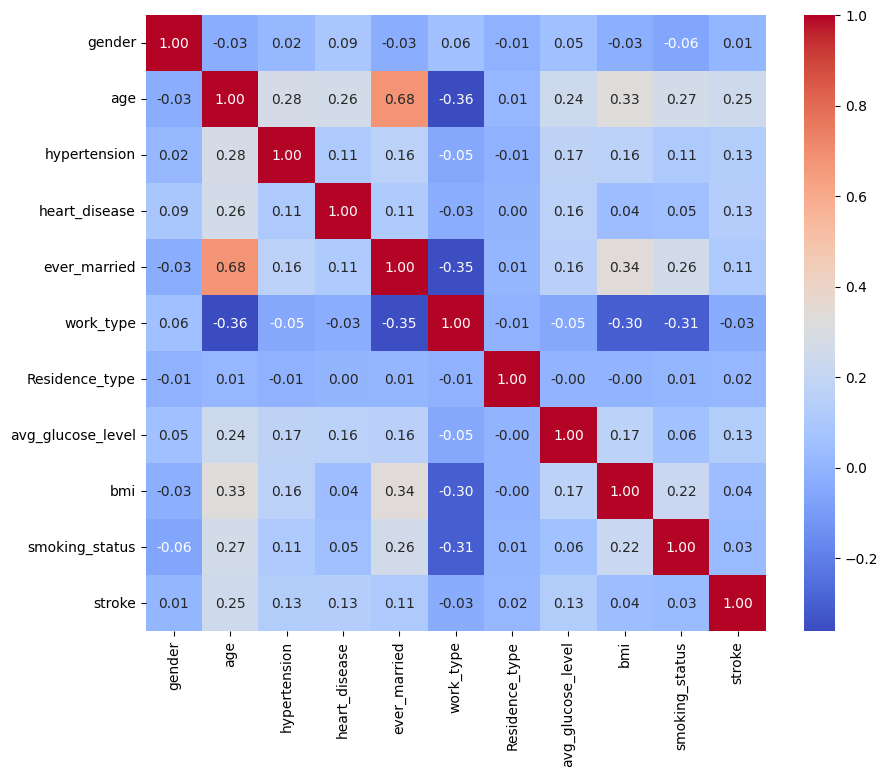

In [45]:
#matriz de correlaciones con el target
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot= True ,fmt=".2f", cmap='coolwarm', cbar=True)

plt.show()

In [46]:
X = new_stroke.drop(['stroke'], axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [47]:
##obtener el target (stroke)
y = new_stroke['stroke']
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


<Axes: title={'center': 'Correlation with target (stroke)'}>

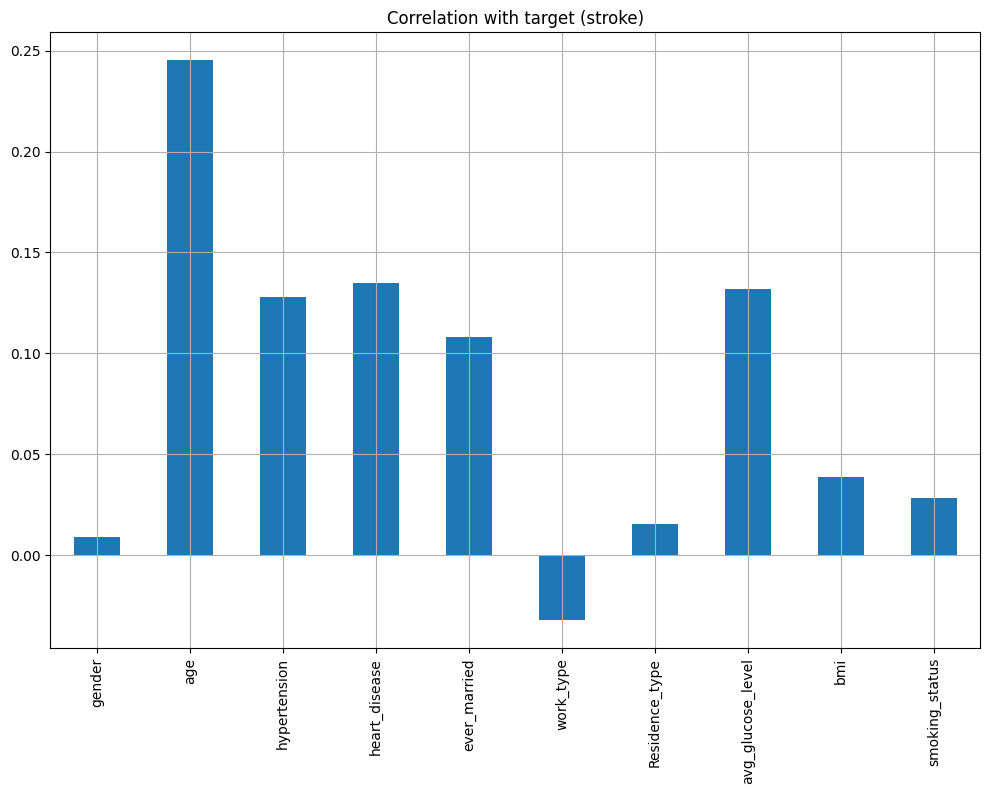

In [48]:
X.corrwith(y).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target (stroke)")

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
#escalamiento de los datos
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [51]:
X_standard

array([[ 1.18979109e+00,  1.05124201e+00, -3.28637494e-01, ...,
         2.70644995e+00,  1.00104066e+00, -3.51819397e-01],
       [-8.40483686e-01,  7.85888689e-01, -3.28637494e-01, ...,
         2.12165168e+00, -1.65111256e-04,  5.81433614e-01],
       [ 1.18979109e+00,  1.62617420e+00, -3.28637494e-01, ...,
        -4.86741416e-03,  4.68398925e-01,  5.81433614e-01],
       ...,
       [-8.40483686e-01, -3.63975698e-01, -3.28637494e-01, ...,
        -5.11265616e-01,  2.21564950e-01,  5.81433614e-01],
       [ 1.18979109e+00,  3.43633155e-01, -3.28637494e-01, ...,
         1.32837547e+00, -4.27998141e-01, -3.51819397e-01],
       [-8.40483686e-01,  3.40542820e-02, -3.28637494e-01, ...,
        -4.60692049e-01, -3.50050570e-01, -1.28507241e+00]])

In [52]:
from sklearn.pipeline import Pipeline

In [53]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [54]:
numerical_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [55]:
num_pipeline = Pipeline([
              ('imputer',SimpleImputer(strategy="mean")),
              ('std_scaler',StandardScaler())
              ])

In [114]:
categorical_transformer = Pipeline(steps=[
    ('label_encoder', LabelEncoder())
    ])

In [56]:
from sklearn.compose import ColumnTransformer

In [117]:
full_pipeline = ColumnTransformer([
              ("num", num_pipeline, numerical_features)
              ])

In [118]:
import joblib
from joblib import dump
dump(full_pipeline,'stroke_pipeline.sav')

['stroke_pipeline.sav']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.3, random_state=42, stratify=y)

In [60]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)

In [61]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [63]:
#se carga el modelo de regresion logistica
log_reg = LogisticRegression()

In [64]:
model = log_reg.fit(X_train_smote, y_train_smote)

In [65]:
y_pred = model.predict(X_test)

In [66]:
accuracy_score(y_test, y_pred)

0.7416829745596869

In [67]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.74      0.85      1458
           1       0.13      0.76      0.22        75

    accuracy                           0.74      1533
   macro avg       0.56      0.75      0.53      1533
weighted avg       0.94      0.74      0.81      1533



In [68]:
#Busqueda de mejores hiperparámetros con el grid search
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2','elasticnet'],
    'max_iter'  : [100,1000,2500,5000]
}
# C: parámetro de regularización inversa. Controla la penalización que se aplica a los coeficientes del modelo. Un valor más pequeño de C (como 0.001 o 0.01) indica una mayor regularización, lo que evita el sobreajuste pero puede dar lugar a un modelo menos flexible.
# penalty: Es el tipo de regularización aplicada. En regresión logística, es importante evitar que los coeficientes crezcan

In [69]:
# Configurar GridSearchCV con validación cruzada
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1)

In [70]:
grid_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
960 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=1)

In [71]:
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [72]:
# Evaluar el modelo con los mejores parámetros
best_model_LR = grid_search.best_estimator_
y_pred2 = best_model_LR.predict(X_test)

In [73]:
accuracy = accuracy_score(y_test, y_pred2)
report = classification_report(y_test, y_pred2)

In [74]:
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

In [75]:
print(f"Accuracy con mejores parámetros: {accuracy}")
print(f"Precision con mejores parámetros: {precision}")
print(f"Recall con mejores parámetros: {recall}")
print(f"F1 Score con mejores parámetros: {f1}")
print("Classification Report:\n", report)

Accuracy con mejores parámetros: 0.7175472928897586
Precision con mejores parámetros: 0.12236286919831224
Recall con mejores parámetros: 0.7733333333333333
F1 Score con mejores parámetros: 0.21129326047358835
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.71      0.83      1458
           1       0.12      0.77      0.21        75

    accuracy                           0.72      1533
   macro avg       0.55      0.74      0.52      1533
weighted avg       0.94      0.72      0.80      1533



In [76]:
from sklearn.metrics import  confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred2)

In [77]:
print(conf_matrix)

[[1042  416]
 [  17   58]]


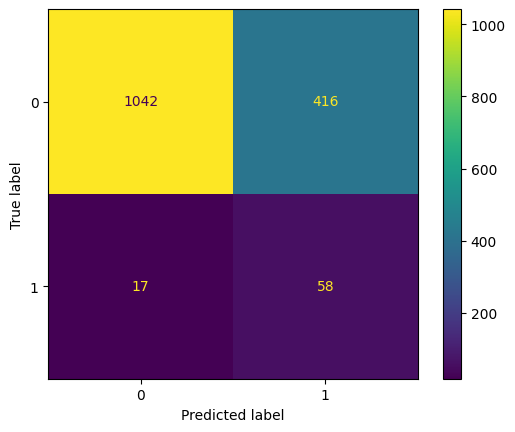

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model_LR.classes_)
disp.plot()
plt.show()

In [79]:
dump(best_model_LR,'model_LR.sav')

['model_LR.sav']

In [80]:
#Basándonos en la literatura revisada, el modelo de regresión logística se encuentra entre el margen deseado (75%-78%)
#Si no se le agrega la estrategia de balance SMOTE, sube el accuracy, pero no clasifica ninguna en stroke

In [81]:
#Uso del SVC polinomial
from sklearn.svm import SVC
poly_clf = SVC(kernel='poly', degree=2, coef0=1, C=5)
poly_clf.fit(X_train_smote, y_train_smote)

SVC(C=5, coef0=1, degree=2, kernel='poly')

In [82]:
#evaluacion
predict_poly = poly_clf.predict(X_test)

In [83]:
accuracy_score(y_test, predict_poly)

0.735812133072407

In [84]:
print("Classification Report: \n", classification_report(y_test, predict_poly))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.74      0.84      1458
           1       0.11      0.64      0.19        75

    accuracy                           0.74      1533
   macro avg       0.54      0.69      0.52      1533
weighted avg       0.93      0.74      0.81      1533



In [85]:
#grid search
param_grid = {'C': [0.1,1.0,5.0,10.0,100.0], 'degree': [2,3,4], 'coef0': [0.0,0.5,1.0]}
grid_search_poly = GridSearchCV(SVC(kernel='poly'), param_grid, cv=5)
grid_search_poly.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.1, 1.0, 5.0, 10.0, 100.0],
                         'coef0': [0.0, 0.5, 1.0], 'degree': [2, 3, 4]})

In [86]:
print("Mejores parámetros:", grid_search_poly.best_params_)

Mejores parámetros: {'C': 100.0, 'coef0': 1.0, 'degree': 4}


In [87]:
#evaluar mejores parametros
best_poly_clf = grid_search_poly.best_estimator_
y_pred_grid_poly = best_poly_clf.predict(X_test)

In [88]:
accuracy_score(y_test, y_pred_grid_poly)

0.8408349641226354

In [89]:
print("Classification Report: \n", classification_report(y_test, y_pred_grid_poly))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.87      0.91      1458
           1       0.10      0.29      0.15        75

    accuracy                           0.84      1533
   macro avg       0.53      0.58      0.53      1533
weighted avg       0.92      0.84      0.88      1533



In [90]:
conf_matrix = confusion_matrix(y_test, y_pred_grid_poly)
print(conf_matrix)

[[1267  191]
 [  53   22]]


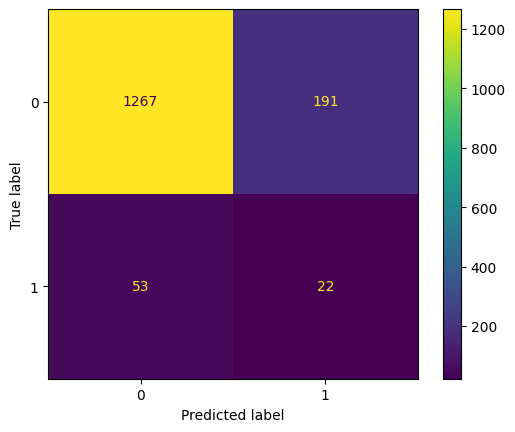

In [91]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_poly_clf.classes_)
disp.plot()
plt.show()

In [92]:
dump(best_poly_clf,'model_poly.sav')

['model_poly.sav']

In [93]:
#SVC con kernel gaussiano
from sklearn.svm import SVC
rbf_clf = SVC(kernel='rbf', gamma=0.1, C=10)
rbf_clf.fit(X_train_smote, y_train_smote)

SVC(C=10, gamma=0.1)

In [94]:
#evaluacion
predict_rbf = rbf_clf.predict(X_test)

In [95]:
accuracy_score(y_test, predict_rbf)

0.8160469667318982

In [100]:
print("Classification Report: \n", classification_report(y_test, predict_rbf))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.84      0.90      1458
           1       0.11      0.39      0.17        75

    accuracy                           0.82      1533
   macro avg       0.54      0.61      0.53      1533
weighted avg       0.92      0.82      0.86      1533



In [101]:
conf_matrix = confusion_matrix(y_test, predict_rbf)
print(conf_matrix)

[[1222  236]
 [  46   29]]


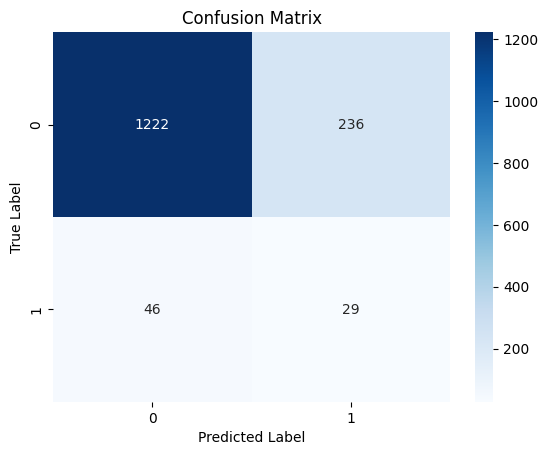

In [102]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [103]:
#grid search
param_grid = {'C':[0.01,0.1,1.0,10.0,100.0],'gamma':[0.1,1.0,5.0,10.0,100.0]}
grid_search_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search_rbf.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.1, 1.0, 5.0, 10.0, 100.0]})

In [104]:
print("Mejores parámetros:", grid_search_rbf.best_params_)

Mejores parámetros: {'C': 100.0, 'gamma': 1.0}


In [105]:
#evaluar mejores parametros
best_rbf_clf = grid_search_rbf.best_estimator_
y_pred_grid_rbf = best_rbf_clf.predict(X_test)

In [106]:
accuracy_score(y_test, y_pred_grid_rbf)

0.8969341161121983

In [108]:
print("Classification Report: \n", classification_report(y_test, y_pred_grid_rbf))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      1458
           1       0.07      0.09      0.08        75

    accuracy                           0.90      1533
   macro avg       0.51      0.52      0.51      1533
weighted avg       0.91      0.90      0.90      1533



In [109]:
conf_matrix = confusion_matrix(y_test, y_pred_grid_rbf)
print(conf_matrix)

[[1368   90]
 [  68    7]]


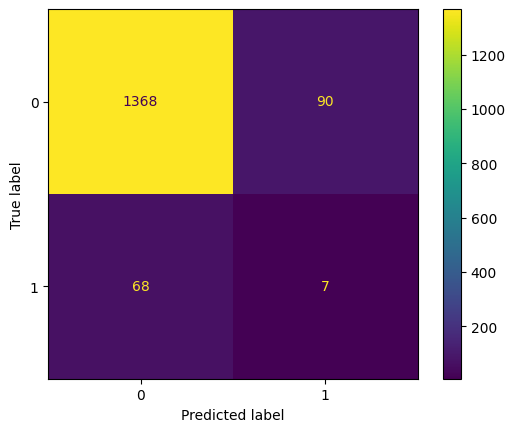

In [110]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_rbf_clf.classes_)
disp.plot()
plt.show()

In [111]:
dump(best_rbf_clf,'model_rbf.sav')

['model_rbf.sav']

In [ ]:
#De igual manera, revisando la literatura se puede apreciar que ambos modelos con sus mejores parametros es competitivo.